/var/folders/gl/2q9xsmfd5ll6rjdlnqfslpqr0000gn/T/ipykernel_58899/1875416479.py:20: ODEintWarning: Integration successful.
  sol = odeint(harmonic_oscillator_ode, y0, xspan, args=(epsilon_guess,), printmessg = 1)
/var/folders/gl/2q9xsmfd5ll6rjdlnqfslpqr0000gn/T/ipykernel_58899/1875416479.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = np.sqrt(np.trapz(phi**2, x))


Eigenvalues (A2):
[0.99999998 2.9999994  4.99998953 6.99988319 8.99906078]


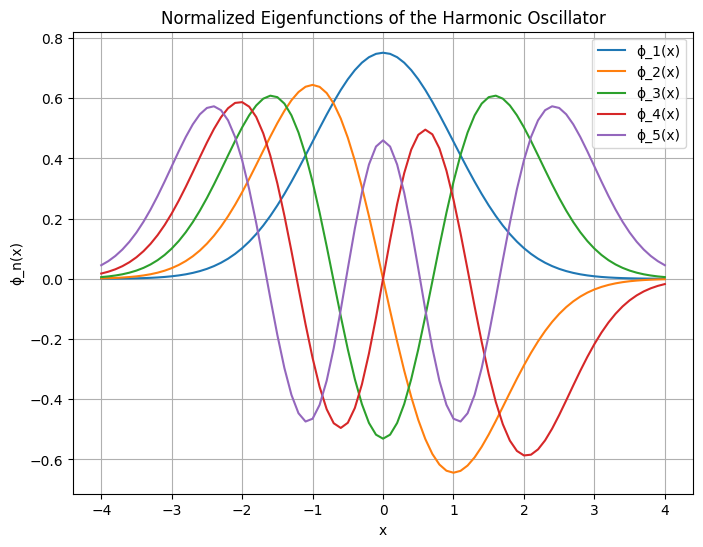

Eigenfunctions (A1):
[[2.56183470e-04 1.45461736e-03 5.66711042e-03 1.74588477e-02
  4.50516647e-02]
 [3.76940965e-04 2.08377489e-03 7.88695715e-03 2.35399844e-02
  5.86293773e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583009e-02
  7.58484063e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281012e-02
  9.71899192e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048299e-02
  1.23080914e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653864e-02
  1.53831251e-01]
 [2.32055909e-03 1.11600069e-02 3.63163648e-02 9.17795062e-02
  1.89559875e-01]
 [3.24364379e-03 1.51394491e-02 4.76780809e-02 1.16171083e-01
  2.30113262e-01]
 [4.48904553e-03 2.03165046e-02 6.18486347e-02 1.45069154e-01
  2.74981576e-01]
 [6.15097107e-03 2.69674234e-02 7.92584567e-02 1.78649428e-01
  3.23220568e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868661e-01
  3.73389609e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395937e-01
  4.23518008e-01]
 [1.49032591e-02 5.

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
L = 4       # Boundaries
K = 1       # Given K value
xspan = np.linspace(-L, L, 81, endpoint=True)
tol = 1e-4  # Tolerance for shooting

# Function to define the system of first-order ODEs
def harmonic_oscillator_ode(y, x, epsilon):
    """System of ODEs for the quantum harmonic oscillator."""
    return [y[1], (K * x**2 - epsilon) * y[0]]

# Function to perform the shooting method for a given eigenvalue guess
def shoot(epsilon_guess):
    """Solve the ODE for a given eigenvalue guess and return the solution at the boundary."""
    y0 = [1, np.sqrt(16 - epsilon_guess)]  # Initial conditions: ϕ(0) = 1, ϕ'(0) = 0
    sol = odeint(harmonic_oscillator_ode, y0, xspan, args=(epsilon_guess,), printmessg = 1)
    return sol

# Function to normalize the eigenfunction
def normalize(phi, x):
    """Normalize the eigenfunction using trapezoidal integration."""
    norm = np.sqrt(np.trapz(phi**2, x))
    return phi / norm

# Main function to compute eigenfunctions and eigenvalues
def compute_eigenfunctions_and_values(num_eigenvalues):
    eigenvalues = []
    eigenfunctions = []
    
    starting_guess = 0.1
    for i in range(1, 6):
        epsilon_guess = starting_guess
        dE = epsilon_guess / 100  # Step size for refining eigenvalue guess
        # Shooting method loop
        while True:
            # Solve ODE with current eigenvalue guess
            phi_L = shoot(epsilon_guess)  # Get value of ϕ(L) to check if it's close to 0
            # Check if we are close enough to the boundary condition ϕ(L) ≈ 0
            if np.abs((phi_L[-1, 1] + np.sqrt(16 - epsilon_guess) * phi_L[-1, 0])- 0) < tol:
                
                break
            if (-1) ** (i + 1) * (phi_L[-1, 1] + np.sqrt(16 - epsilon_guess) * phi_L[-1, 0]) > 0:
                epsilon_guess += dE
            else:
                epsilon_guess -= dE / 2  # If too low, increase epsilon
                dE /= 2  # Refine the step size
        # Store the found eigenvalue
        eigenvalues.append(epsilon_guess)
        starting_guess = epsilon_guess + 0.1
        # Solve again to get the eigenfunction with the found eigenvalue
        sol = shoot(epsilon_guess)
        phi = sol[:, 0]
        
        # Normalize the eigenfunction
        normalized_phi = normalize(phi, xspan)
        
        # Store the normalized eigenfunction
        eigenfunctions.append(normalized_phi)
    
    return np.array(eigenfunctions).T, np.array(eigenvalues)

# Compute the first 5 eigenfunctions and eigenvalues
A1, A2 = compute_eigenfunctions_and_values(5)

# Plot the eigenfunctions
x_vals = np.linspace(-L, L, len(xspan))
plt.figure(figsize=(8, 6))
for i in range(A1.shape[1]):
    plt.plot(x_vals, A1[:, i], label=f'ϕ_{i+1}(x)')
plt.title('Normalized Eigenfunctions of the Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('ϕ_n(x)')
plt.legend()
plt.grid()
plt.show()

A1 = np.abs(A1)
# Display the results
print("Eigenfunctions (A1):")
print(A1)
print("Eigenvalues (A2):")
print(A2)